# Connecticut Real Estate Sales (2001–2022) Exploratory Data Analysis

Andre Warsaw

Professor Abdirisak Mohamed

Data 201

Oct 30, 2025



For my project, I will be observing an old data set I originally observed for another class, but I felt I could give a better analysis now that I have more context of what the data set offers. The data set covers residential real estate sales across Connecticut from **2001–2022**, focusing on price levels, trends over time, market mix by property/residential types, and regional (town-level) differences.

If you would like to look into my previous EDA of this data set, I have published it on my rpubs account, and have copied the link here for reference:

https://rpubs.com/wasraw/1327442

## About the dataset
- **Source:** Webscraped by Omnia Mahmoud Saeed, if you would like to explore further see link provided https://www.kaggle.com/datasets/omniamahmoudsaeed/real-estate-sales-2001-2022
- **Grain:** Each row represents a **recorded sale** event for a property, with associated assessment and classification at time of record.  
- **Period:** 2001 through 2022.  
- **Geography:** Town-level mostly within the State of Connecticut.

### Variables Included in the Data Set
- **Serial Number** — Unique record identifier.
- **List Year**
- **Date Recorded** — Date the deed/sale was recorded by author.
- **Town**
- **Address** — Street address (can be incomplete or redacted).
- **Assessed Value** — Assessor’s valuation (USD).
- **Sale Amount** — Final sale price.
- **Sales Ratio** — Ratio of the sale amount to the assessed value.
- **Property Type** — Broad classification (e.g., Residential, Commercial, Vacant Land).
- **Residential Type** — Finer classification for residential properties (e.g., Single Family, Condo).
- **Non Use Code** — For land that is not used for typical purpose i.e. vacant land.
- **Assessor Remarks**
- **OPM remarks** — Remarks from Office of Policy & Management (if present).
- **Location** — Longitude and Latitude point of the location (if available).



### Uploading and Quick Preperartions for the Data Set Before Cleaning

In [3]:
#To import the file from my local directory
from google.colab import files
uploaded = files.upload()

Saving Real_Estate_Sales_2001-2022_GL.csv to Real_Estate_Sales_2001-2022_GL.csv


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", 100)
pd.set_option("display.width", 120)

sns.set(context="notebook", style="whitegrid")

def iqr_filter(series, k=3.0):
    q1, q3 = series.quantile([0.25, 0.75])
    iqr = q3 - q1
    lo = q1 - k * iqr
    hi = q3 + k * iqr
    return (series >= lo) & (series <= hi)


In [4]:

CSV_PATH = "Real_Estate_Sales_2001-2022_GL.csv"

raw = pd.read_csv(CSV_PATH, low_memory=False)
print("Raw shape:", raw.shape)
raw.head(10)


Raw shape: (1097629, 14)


,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
0,2020177,2020,04/14/2021,Ansonia,323 BEAVER ST,133000.0,248400.0,0.535400,Residential,Single Family,NaN,NaN,NaN,POINT (-73.06822 41.35014)
1,2020225,2020,05/26/2021,Ansonia,152 JACKSON ST,110500.0,239900.0,0.460600,Residential,Three Family,NaN,NaN,NaN,NaN
2,2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.463000,Commercial,NaN,NaN,NaN,NaN,NaN
3,2020090,2020,12/14/2020,Ansonia,57 PLATT ST,127400.0,202500.0,0.629100,Residential,Two Family,NaN,NaN,NaN,NaN
4,210288,2021,06/20/2022,Avon,12 BYRON DRIVE,179990.0,362500.0,0.496500,Residential,Condo,NaN,NaN,NaN,POINT (-72.879115982 41.773452988)
5,200500,2020,09/07/2021,Avon,245 NEW ROAD,217640.0,400000.0,0.544100,Residential,Single Family,NaN,NaN,NaN,NaN
6,200121,2020,12/15/2020,Avon,63 NORTHGATE,528490.0,775000.0,0.681900,Residential,Single Family,NaN,NaN,NaN,POINT (-72.89675 41.79445)
7,20058,2020,06/01/2021,Barkhamsted,46 RATLUM MTN RD,203530.0,415000.0,0.490434,Residential,Single Family,NaN,"2003 COLONIAL, 2140 SFLA, 2.99 AC",NaN,NaN
8,200046,2020,01/25/2021,Beacon Falls,34 LASKY ROAD,158030.0,243000.0,0.650300,Residential,Single Family,NaN,NaN,NaN,NaN
9,200016,2020,11/13/2020,Beacon Falls,9 AVON COURT,65590.0,100000.0,0.655900,Residential,Condo,NaN,NaN,NaN,NaN


### Preliminary data set cleaning before moving forward

In [5]:
df = raw.copy()

df.columns = df.columns.str.strip()

rename_map = {
    "Serial Number": "serial_number",
    "List Year": "list_year",
    "Date Recorded": "date_recorded",
    "Town": "town",
    "Address": "address",
    "Assessed Value": "assessed_value",
    "Sale Amount": "sale_amount",
    "Sales Ratio": "sales_ratio",
    "Property Type": "property_type",
    "Residential Type": "residential_type",
    "Non Use Code": "non_use_code",
    "Assessor Remarks": "assessor_remarks",
    "OPM remarks": "opm_remarks",
    "Location": "location"}

df = df.rename(columns={k: v for k, v in rename_map.items() if k in df.columns})

for c in df.select_dtypes(include="object").columns:
    df[c] = df[c].astype(str).str.strip().replace({"nan": np.nan})

for c in ["assessed_value", "sale_amount", "sales_ratio", "list_year"]:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors="coerce")

if "date_recorded" in df.columns:
    df["date_recorded"] = pd.to_datetime(df["date_recorded"], errors="coerce")

print("After normalization:", df.shape)
print(df.dtypes)
df[["date_recorded","town","sale_amount","assessed_value","property_type","residential_type"]].head(10)


After normalization: (1097629, 14)
serial_number                int64
list_year                    int64
date_recorded       datetime64[ns]
town                        object
address                     object
assessed_value             float64
sale_amount                float64
sales_ratio                float64
property_type               object
residential_type            object
non_use_code                object
assessor_remarks            object
opm_remarks                 object
location                    object
dtype: object


,date_recorded,town,sale_amount,assessed_value,property_type,residential_type
0,2021-04-14,Ansonia,248400.0,133000.0,Residential,Single Family
1,2021-05-26,Ansonia,239900.0,110500.0,Residential,Three Family
2,2021-09-13,Ansonia,325000.0,150500.0,Commercial,NaN
3,2020-12-14,Ansonia,202500.0,127400.0,Residential,Two Family
4,2022-06-20,Avon,362500.0,179990.0,Residential,Condo
5,2021-09-07,Avon,400000.0,217640.0,Residential,Single Family
6,2020-12-15,Avon,775000.0,528490.0,Residential,Single Family
7,2021-06-01,Barkhamsted,415000.0,203530.0,Residential,Single Family
8,2021-01-25,Beacon Falls,243000.0,158030.0,Residential,Single Family
9,2020-11-13,Beacon Falls,100000.0,65590.0,Residential,Condo


In [6]:

missing_counts = df.isna().sum().sort_values(ascending=False)
print("Missing counts:\n", missing_counts.head(20))

if "sale_amount" in df.columns:
    before = len(df)
    df = df[df["sale_amount"].fillna(0) > 0].copy()
    print(f"Filtered non-positive sale_amount: {before} -> {len(df)}")

if "assessed_value" in df.columns:
    df.loc[df["assessed_value"] <= 0, "assessed_value"] = np.nan

if "date_recorded" in df.columns:
    df["year"] = df["date_recorded"].dt.year
    df["month"] = df["date_recorded"].dt.month

if "sales_ratio" in df.columns:
    df.loc[~df["sales_ratio"].between(0.05, 5.0, inclusive="both"), "sales_ratio"] = np.nan

# Remove extreme outliers in sale_amount for display
if "sale_amount" in df.columns:
    mask_amt = iqr_filter(df["sale_amount"], k=5.0)  # looser bounds to keep more data
    df["keep_amt_for_viz"] = mask_amt
else:
    df["keep_amt_for_viz"] = True

print(df[["year","sale_amount","assessed_value","sales_ratio"]].describe(include="all"))


Missing counts:
 opm_remarks         1084598
assessor_remarks     926401
location             799518
non_use_code         784178
residential_type     398389
property_type        382446
address                  51
date_recorded             2
serial_number             0
list_year                 0
assessed_value            0
town                      0
sale_amount               0
sales_ratio               0
dtype: int64
Filtered non-positive sale_amount: 1097629 -> 1095819
               year   sale_amount  assessed_value   sales_ratio
count  1.095819e+06  1.095819e+06    1.088917e+06  1.065563e+06
mean   2.011979e+03  4.059840e+05    2.837201e+05  7.037579e-01
std    6.775994e+00  5.147712e+06    1.664024e+06  4.560978e-01
min    1.999000e+03  1.000000e+00    1.000000e+00  5.000000e-02
25%    2.005000e+03  1.450000e+05    9.009000e+04  4.822714e-01
50%    2.012000e+03  2.340000e+05    1.413900e+05  6.109000e-01
75%    2.018000e+03  3.750000e+05    2.292500e+05  7.643003e-01
max    2.023

### How many sales were recorded each year?
We start with volume to understand data coverage and cycles (e.g., pre/post 2008, and 2020–2022).


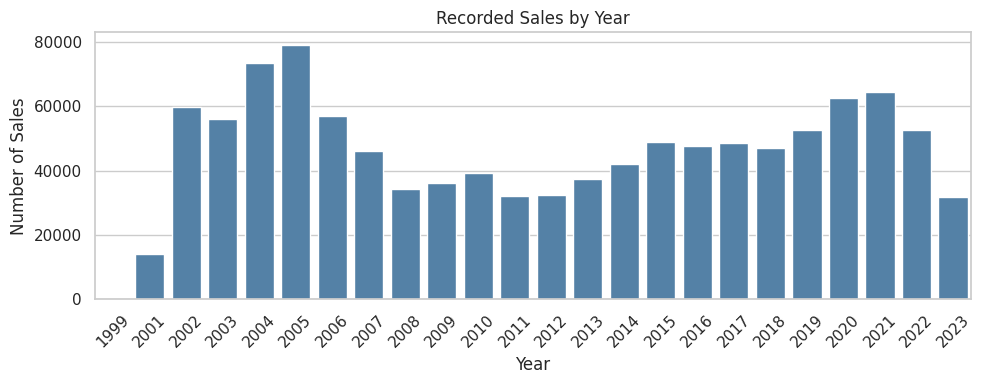

,year,n
19,2019,52622
20,2020,62534
21,2021,64441
22,2022,52735
23,2023,31681


In [7]:
year_counts = df.groupby("year", dropna=True).size().rename("n").reset_index()
plt.figure(figsize=(10,4))
sns.barplot(data=year_counts, x="year", y="n", color="steelblue")
plt.title("Recorded Sales by Year")
plt.xlabel("Year")
plt.ylabel("Number of Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

display(year_counts.tail())


### How did median sale prices evolve over time?
We compute the annual median to keep the visualization smooth and highlight cycle peaks/troughs.


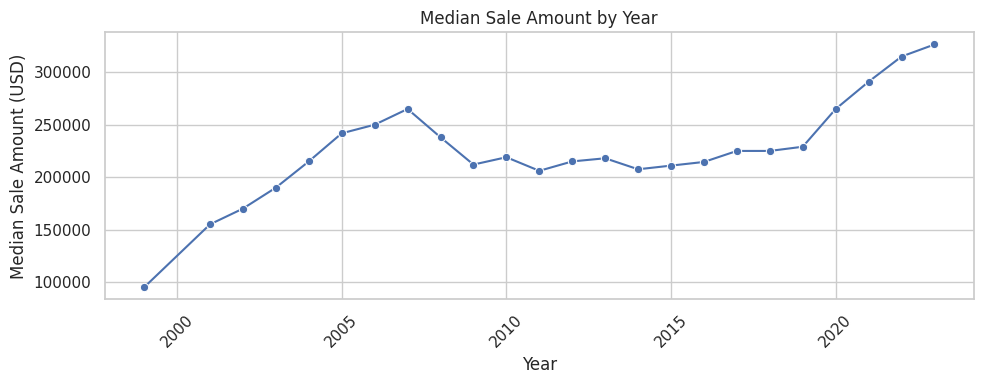

,year,sale_amount
14,2014,207500.0
15,2015,211000.0
16,2016,214500.0
17,2017,225000.0
18,2018,225000.0
19,2019,229000.0
20,2020,265000.0
21,2021,291000.0
22,2022,315000.0
23,2023,326500.0


In [10]:
annual_median = df.groupby("year", dropna=True)["sale_amount"].median().reset_index()
plt.figure(figsize=(10,4))
sns.lineplot(data=annual_median, x="year", y="sale_amount", marker="o")
plt.title("Median Sale Amount by Year")
plt.xlabel("Year")
plt.ylabel("Median Sale Amount (USD)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

annual_median.tail(10)


### What property types dominate, and how do residential subtypes break down?
We view counts and relative shares for both **property_type** and **residential_type**.


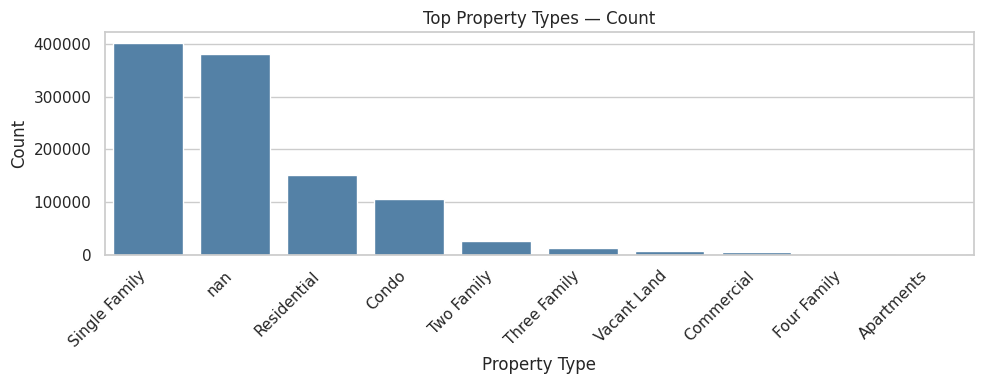

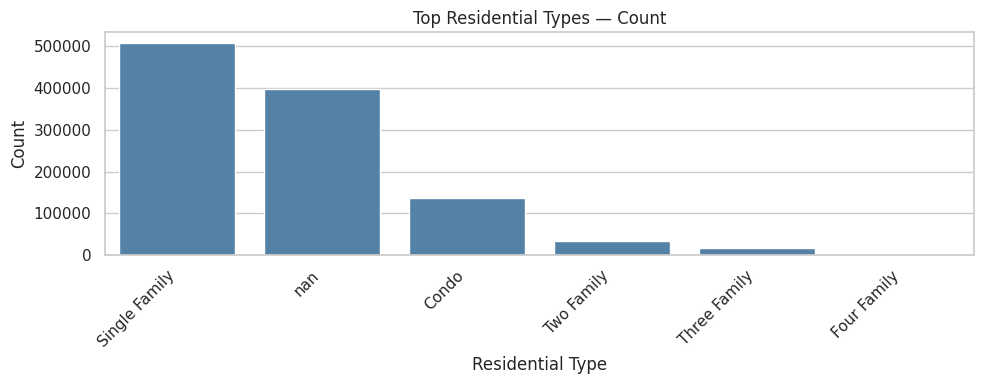

(property_type
 Single Family    401522
 NaN              380748
 Residential      151064
 Condo            105406
 Two Family        26401
 Three Family      12586
 Vacant Land        7824
 Commercial         5987
 Four Family        2149
 Apartments         1327
 Name: count, dtype: int64,
 residential_type
 Single Family    507954
 NaN              396691
 Condo            136808
 Two Family        34841
 Three Family      16567
 Four Family        2958
 Name: count, dtype: int64)

In [12]:
plt.figure(figsize=(10,4))
top_pt = df["property_type"].value_counts(dropna=False).head(10)
sns.barplot(x=top_pt.index.astype(str), y=top_pt.values, color="steelblue")
plt.title("Top Property Types — Count")
plt.ylabel("Count")
plt.xlabel("Property Type")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

if "residential_type" in df.columns:
    plt.figure(figsize=(10,4))
    top_rt = df["residential_type"].value_counts(dropna=False).head(10)
    sns.barplot(x=top_rt.index.astype(str), y=top_rt.values, color="steelblue")
    plt.title("Top Residential Types — Count")
    plt.ylabel("Count")
    plt.xlabel("Residential Type")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

top_pt, top_rt if "residential_type" in df.columns else top_pt


### Which towns have the most sales and highest median prices?
We profile top towns by **volume** and by **median sale price** (min 50 sales).


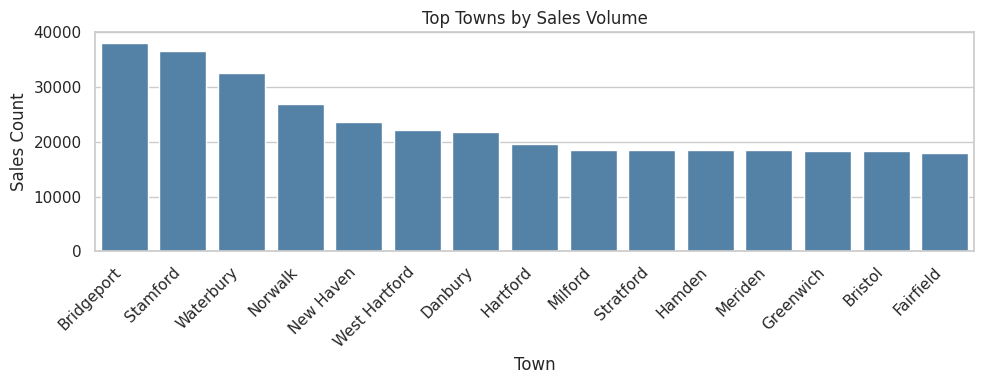

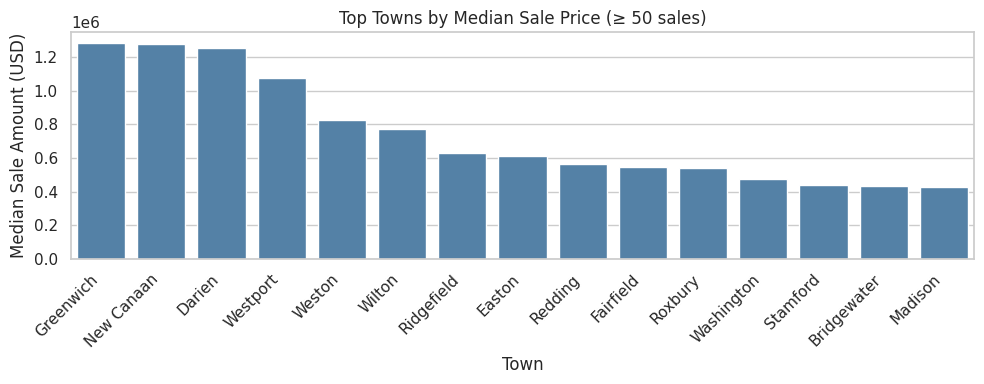

(              town      n  median_price
 15      Bridgeport  38123      160000.0
 135       Stamford  36624      440000.0
 151      Waterbury  32653      122000.0
 103        Norwalk  26926      395000.0
 93       New Haven  23696      180000.0
 154  West Hartford  22096      285000.0
 34         Danbury  21884      282200.0
 64        Hartford  19595      147000.0
 84         Milford  18569      269000.0
 138      Stratford  18504      243000.0
 62          Hamden  18499      200000.0
 80         Meriden  18454      155000.0
 57       Greenwich  18336     1285000.0
 17         Bristol  18303      170000.0
 51       Fairfield  17913      545000.0,
             town      n  median_price
 57     Greenwich  18336     1285000.0
 90    New Canaan   7071     1280000.0
 35        Darien   7287     1255000.0
 158     Westport  10262     1075000.0
 157       Weston   3717      825000.0
 161       Wilton   6008      775000.0
 118   Ridgefield   8596      628750.0
 47        Easton   2549      6

In [13]:
town_stats = df.groupby("town", dropna=True).agg(
    n=("serial_number","count"),
    median_price=("sale_amount","median")
).reset_index()


top_volume = town_stats.sort_values("n", ascending=False).head(15)


top_price = town_stats[town_stats["n"] >= 50].sort_values("median_price", ascending=False).head(15)

plt.figure(figsize=(10,4))
sns.barplot(data=top_volume, x="town", y="n", color="steelblue")
plt.title("Top Towns by Sales Volume")
plt.xlabel("Town")
plt.ylabel("Sales Count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,4))
sns.barplot(data=top_price, x="town", y="median_price", color="steelblue")
plt.title("Top Towns by Median Sale Price (≥ 50 sales)")
plt.xlabel("Town")
plt.ylabel("Median Sale Amount (USD)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

top_volume, top_price


### Are sales seasonal within a year?
We look at monthly seasonality to capture listing/sales cycles


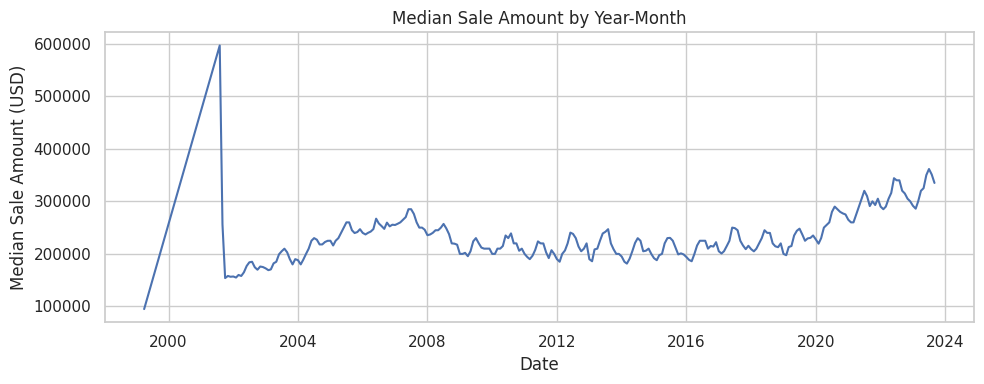

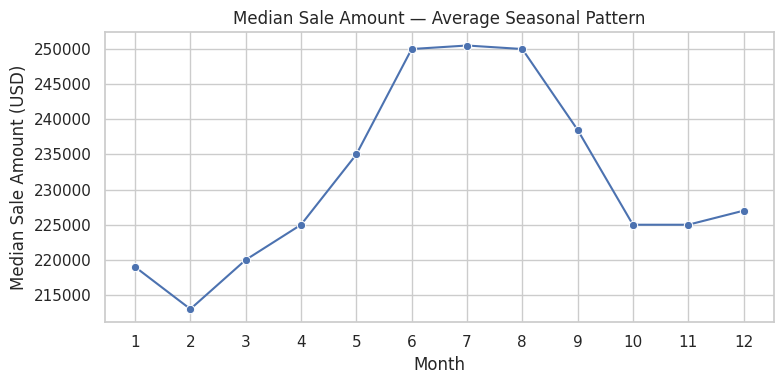

In [14]:
if {"year","month"}.issubset(df.columns):
    monthly = (df
        .groupby(["year","month"], dropna=True)["sale_amount"]
        .median()
        .reset_index())
    monthly["year_month"] = pd.to_datetime(dict(year=monthly["year"].astype(int),
                                               month=monthly["month"].astype(int), day=1))

    plt.figure(figsize=(10,4))
    sns.lineplot(data=monthly, x="year_month", y="sale_amount")
    plt.title("Median Sale Amount by Year-Month")
    plt.xlabel("Date")
    plt.ylabel("Median Sale Amount (USD)")
    plt.tight_layout()
    plt.show()


    month_pattern = df.groupby("month", dropna=True)["sale_amount"].median().reset_index()
    plt.figure(figsize=(8,4))
    sns.lineplot(data=month_pattern, x="month", y="sale_amount", marker="o")
    plt.title("Median Sale Amount — Average Seasonal Pattern")
    plt.xlabel("Month")
    plt.ylabel("Median Sale Amount (USD)")
    plt.xticks(range(1,13))
    plt.tight_layout()
    plt.show()

    month_pattern


## Summary & Observations

- **Housing Market Crash:** The impact that the housing market crash in 2008 had in the state of Conneticut is very notable when observing the number of sales recorded by year.
- **Counties in Conneticut:** Bridgeford and Stamford are popular counties to own a home (according to the Top town by sales volume visualization). Greenwich, New Canaan and Darien are the top three most expensive counties to purchase a home (according to the Top Towns by Median Sales Price visualization).
- **Housing Market Trends:** There is a noticeable incline in median sale price, which may play a part in the concerning decline in house sales from 2021-2023, echoing the trends which occured prior to the housing market crash.
- **Seasonality:** A clear trend is present, where Summer is the most popular time to purchase a home, and winter is the least popular.

> Overall, results align with expectations for a statewide residential market across two decades: cyclical activity, long-run price appreciation, and material town-level and property-mix differences.
